In [4]:
import sys
sys.path.insert(1, '/home/maria/Documents/EnsemblePursuit')
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, gaussian_filter1d
import seaborn as sns

In [2]:
data_path='/home/maria/Documents/data_for_suite2p/TX39/'
dt=1
spks= np.load(data_path+'spks.npy')
print('Shape of the data matrix, neurons by timepoints:',spks.shape)
iframe = np.load(data_path+'iframe.npy') # iframe[n] is the microscope frame for the image frame n
ivalid = iframe+dt<spks.shape[-1] # remove timepoints outside the valid time range
iframe = iframe[ivalid]
S = spks[:, iframe+dt]
U=np.load('U.npy')
input_patterns=S[np.nonzero(U[:,13])[0],:]
input_patterns=zscore(input_patterns,axis=1)
del spks
del S

Shape of the data matrix, neurons by timepoints: (18795, 30766)


In [3]:
weights=np.load('/media/maria/DATA1/Documents/Neocortex/SOC/soc.txt.npy')

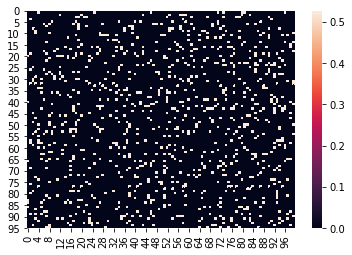

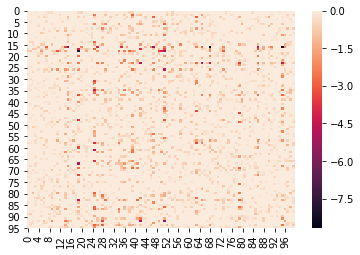

In [26]:
#Inhibitory sub-population
num_neurons=200
first_quadrant = np.arange(num_neurons/2)
second_quadrant = first_quadrant + num_neurons/2
first_quadrant=first_quadrant.astype('int')
second_quadrant=second_quadrant.astype('int')
W_IE = weights[np.ix_(second_quadrant,first_quadrant)]
W_II = weights[np.ix_(second_quadrant,second_quadrant)]
sns.heatmap(W_IE)
plt.show()
sns.heatmap(W_II)

(656, 30560)
(100, 1500)
[[ 1.69052570e+00  1.74499329e+00  1.80185550e+00 ... -4.42611298e+06
  -4.47037416e+06 -4.51507796e+06]
 [-4.65937371e-01 -4.26982266e-01 -4.37707659e-01 ...  6.33332411e+06
   6.39665740e+06  6.46062402e+06]
 [ 3.28201637e-02  7.84328723e-02  1.25277920e-01 ...  6.66814253e+06
   6.73482391e+06  6.80217210e+06]
 ...
 [ 8.69039329e-01  9.22635063e-01  9.69401208e-01 ...  1.02989951e+06
   1.04019856e+06  1.05060059e+06]
 [-3.42117023e-01 -2.95617835e-01 -2.51119996e-01 ...  8.82101398e+06
   8.90922407e+06  8.99831626e+06]
 [-4.71926652e-01 -4.27046982e-01 -3.90814930e-01 ...  1.23345967e+07
   1.24579427e+07  1.25825222e+07]]
5.615289e-10


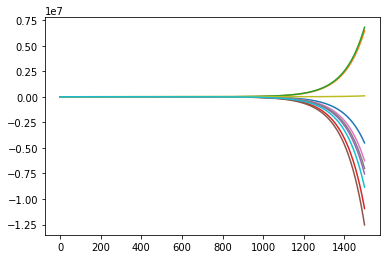

In [66]:
np.random.seed(7)
def gain_function(x):
    x[x<0]= 5*np.tanh(x[x<0]/5)
    '''
    if x<0:
        return 5*np.tanh(x/5)
    else:
        return (100-5)*np.tanh(x/(100-5))
    '''
    x[x>=0]=(10-5)*np.tanh(x[x>=0]/(10-5))
    return x
inh_weights=np.hstack((W_IE,W_II))
#inh_weights=np.random.normal(0,1,(100,200))
activity_pattern=[np.random.normal(0,1,(100,))]
print(input_patterns.shape)
h=0.01
for t in range(1,1500):
    #print(t)
    x=activity_pattern[-1].reshape(100,)
    #print('z',x.shape)
    inp=np.concatenate((input_patterns[:100,t].reshape(100,),x),axis=0)
    dxdt=(-x-gain_function(inh_weights@inp))
    #print('dxdt',dxdt.shape)
    activity_pattern.append(activity_pattern[-1]-h*dxdt.reshape(100,))
    #print(activity_pattern)
activity_patterns=np.array(activity_pattern).T
print(activity_patterns.shape)
print(activity_patterns)
plt.plot(activity_patterns[:10,:].T)
print(np.mean(input_patterns))